In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<br>
<br>
<br>
<br>

# **Entendimento dos Dados**

O processo de entendimento dos dados é fundamental no treinamento de modelos de machine learning por várias razões cruciais. Primeiramente, ele nos permite obter insights sobre a natureza e a qualidade dos dados que estão sendo utilizados, identificando potenciais problemas como dados ausentes, valores discrepantes ou desbalanceamento de classes. Isso possibilita a escolha adequada das técnicas de pré-processamento necessárias para limpar e preparar os dados de forma apropriada para o treinamento do modelo. Além disso, compreender os dados ajuda na seleção das features mais relevantes e informativas para alimentar o modelo, o que pode melhorar significativamente sua capacidade de generalização e desempenho preditivo.

<br>

## **Pacotes e Bibliotecas**

In [ ]:
# Instalação dos Pacotes.
!pip install colorama > /dev/null

In [ ]:
# Importando as bibliotecas Pandas e Numpy.
import pandas as pd
import numpy as np

# Importanto a biblioteca Math para trabalhar com funções matemáticas básicas e constantes matemáticas.
import math

# Importando a biblioteca Matplotlib e Seaborn para plotarmos gráficos que ajudarão no entendimento dos dados.
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

# Módulo que fornece funções para interagir com o sistema operacional subjacente de maneira independente da plataforma.
import os

# Importando as constantes definidas na biblioteca colorama que permitem alterar as cores e estilos de texto impresso no terminal.
from colorama import Fore, Style

# Importando a função Display que é usada para exibir objetos de forma mais amigável.
from IPython.display import display

<br>
<br>
<br>
<br>

## **Funções**

In [ ]:
def info_dataset(dir_path, file_name, num_linhas=10):
    '''
    Esta função carrega um dataset em um diretório específico, exibe quantidade de linhas, e as primeiras linhas do dataset.

    Parâmetros:
    - dir_path: Caminho do diretório onde o arquivo CSV está localizado.
    - file_name: Nome do arquivo CSV.
    - num_linhas: Número de linhas a serem exibidas do DataFrame (padrão: 10).

    Retorna:
    Um print com as informações.
    '''
    # Caminho completo do arquivo CSV.
    file_path = os.path.join(dir_path, file_name)

    # Carrega o DataFrame a partir do arquivo CSV.
    df = pd.read_csv(file_path, sep=',', encoding='latin-1')

    # Extrai o nome do arquivo sem a extensão .csv.
    nome_arquivo = os.path.splitext(file_name)[0]

    # Renomeia o DataFrame para incluir o nome do arquivo.
    globals()[f'df_{nome_arquivo}'] = df

    # Criando o texto a ser exibibido com a quantidade de linhas e colunas.
    print(Fore.BLUE + '=' * 60)
    print('')
    print(f'{Fore.BLUE}{Style.BRIGHT}Nome do DataFrame:{Style.RESET_ALL} df_{nome_arquivo}')
    print('')
    print(f'{Fore.BLUE}{Style.BRIGHT}Quantidade de linhas:{Style.RESET_ALL}', df.shape[0])
    print(f'{Fore.BLUE}{Style.BRIGHT}Quantidade de colunas:{Style.RESET_ALL}', df.shape[1])
    print('')
    print(Fore.BLUE + '=' * 60 + Style.RESET_ALL)
    print('')
    print('')

    # Exibir as primeiras linhas do DataFrame.
    display(df.head(num_linhas))



# =================================================================================================================================================== #



def plot_columns(df, variables):
    '''
    Esta função plota gráficos de colunas para variáveis categóricas em um DataFrame.

    Parâmetros:
    - df: DataFrame contendo os dados.
    - variables: Lista de variáveis categóricas para serem plotadas.

    Retorna:
    Gráficos de colunas para cada variável categórica especificada.
    '''
    num_plots = len(variables)
    num_rows = math.ceil(num_plots / 2)  # Calcula o número de linhas necessárias.
    fig, axes = plt.subplots(num_rows, 2, figsize=(12, 6*num_rows))  # Cria subplots.

    for i, var in enumerate(variables):
        row = i // 2
        col = i % 2
        ax = axes[row, col] if num_rows > 1 else axes[col]

        # Calcula as frequências das categorias e ordena pelos valores.
        category_counts = df[var].value_counts().sort_values(ascending=False)
        top_categories = category_counts.nlargest(10)  # Obtém as 10 categorias com mais ocorrências.

        category_counts = category_counts[category_counts.index.isin(top_categories.index)]  # Mantém apenas as categorias mais frequentes.

        category_counts.plot(kind='bar', ax=ax)

        # Adiciona as porcentagens como anotações acima das barras.
        for idx, value in enumerate(category_counts):
            ax.text(idx, value + 0.03*category_counts.max(), f'{value/len(df)*100:.1f}%', ha='center', va='bottom')  # Adiciona a porcentagem acima das barras.

        ax.set_title(f'Distribuição de {var}')
        ax.set_xlabel(var)
        ax.set_ylabel('Contagem')

        # Rotaciona os rótulos do eixo x em 45 graus.
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

        # Ajusta os limites do eixo y para dar espaço adicional para as anotações de texto.
        ax.set_ylim(0, 1.1 * category_counts.max())

        # Adiciona linhas de grade.
        ax.grid(color='gray', linestyle=':', linewidth=0.5, zorder=0)

    # Remove subplots não utilizados.
    if num_plots % 2 != 0:
        fig.delaxes(axes[-1, -1])

    plt.tight_layout()
    plt.show()



# =================================================================================================================================================== #



def plot_cat_vs_target_cutoff(dataframe, target_column, cutoff=10):
    '''
    Plota gráficos de colunas para analisar as variáveis categóricas em relação ao target, limitando o número de variáveis de acordo com um valor de cutoff.

    Parâmetros:
    - dataframe: DataFrame contendo as variáveis categóricas e a coluna target.
    - target_column: Nome da coluna target.
    - cutoff: Valor de cutoff para limitar o número de variáveis categóricas plotadas (padrão é 10).

    Retorna:
    Gráficos de colunas empilhadas para cada variável categórica especificada.
    '''
    # Seleciona apenas colunas categóricas.
    categorical_columns = dataframe.select_dtypes(include=['object', 'category']).columns

    # Filtra as colunas com base no cutoff.
    categorical_columns_filtered = [col for col in categorical_columns if dataframe[col].nunique() <= cutoff]

    # Define o número de linhas e colunas para os subplots.
    n_rows = len(categorical_columns_filtered) // 3 + (len(categorical_columns_filtered) % 3 > 0)
    n_cols = min(len(categorical_columns_filtered), 3)

    # Cria subplots.
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 5))

    # Ajusta o layout.
    plt.tight_layout(pad=4)

    # Loop pelas colunas categóricas filtradas.
    for i, column in enumerate(categorical_columns_filtered):
        # Calcula proporções de cada categoria para cada valor do target.
        prop_df = (dataframe.groupby([column, target_column]).size() / dataframe.groupby(target_column).size()).unstack()

        # Plota o gráfico de barras.
        ax = axes[i // n_cols, i % n_cols] if n_rows > 1 else axes[i]
        prop_df.plot(kind='bar', stacked=True, ax=ax)
        ax.set_title(column, fontsize=14)
        ax.set_ylabel('Proporção')
        ax.tick_params(axis='both', which='major', labelsize=12)

        # Rotaciona as labels do eixo x.
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

        # Ajusta o layout do subplot.
        plt.subplots_adjust(wspace=0.5, hspace=0.7)

        # Adiciona linhas de grade
        ax.grid(color='gray', linestyle=':', linewidth=0.5, zorder=0)

    # Remove subplots vazios.
    for j in range(len(categorical_columns_filtered), n_rows * n_cols):
        if n_rows > 1:
            fig.delaxes(axes.flatten()[j])
        else:
            fig.delaxes(axes)

    # Adiciona título principal.
    fig.suptitle("Análise de Variáveis Categóricas em relação ao Target", fontsize=18, fontweight='bold', y=1.02)
    plt.show()


# =================================================================================================================================================== #



def plot_cat_vs_target_percentage(dataframe, target_column, cutoff=10):
    '''
    Plota gráficos de colunas empilhadas 100% para analisar as variáveis categóricas em relação ao target, limitando o número de variáveis de acordo com um valor de cutoff.

    Parâmetros:
    - dataframe: DataFrame contendo as variáveis categóricas e a coluna target.
    - target_column: Nome da coluna target.
    - cutoff: Valor de cutoff para limitar o número de variáveis categóricas plotadas (padrão é 10).

    Retorna:
    Gráficos de colunas empilhadas para cada variável categórica especificada.
    '''
    # Seleciona apenas colunas categóricas.
    categorical_columns = dataframe.select_dtypes(include=['object', 'category']).columns

    # Filtra as colunas com base no cutoff.
    categorical_columns_filtered = [col for col in categorical_columns if dataframe[col].nunique() <= cutoff]

    # Define o número de linhas e colunas para os subplots.
    n_rows = len(categorical_columns_filtered) // 3 + (len(categorical_columns_filtered) % 3 > 0)
    n_cols = min(len(categorical_columns_filtered), 3)

    # Cria subplots.
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 5))

    # Ajusta o layout.
    plt.tight_layout(pad=4)

    # Loop pelas colunas categóricas filtradas.
    for i, column in enumerate(categorical_columns_filtered):
        # Calcula proporções de cada categoria para cada valor do target.
        prop_df = (dataframe.groupby([column, target_column]).size() / dataframe.groupby(column).size()).unstack()

        # Plota o gráfico de barras empilhadas 100%.
        ax = axes[i // n_cols, i % n_cols] if n_rows > 1 else axes[i]
        prop_df.plot(kind='bar', stacked=True, ax=ax)
        ax.set_title(column, fontsize=14)
        ax.set_ylabel('Porcentagem')
        ax.tick_params(axis='both', which='major', labelsize=12)

        # Rotaciona as labels do eixo x.
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

        # Ajusta o layout do subplot.
        plt.subplots_adjust(wspace=0.5, hspace=0.7)

        # Adiciona linhas de grade
        ax.grid(color='gray', linestyle=':', linewidth=0.5, zorder=0)

    # Remove subplots vazios.
    for j in range(len(categorical_columns_filtered), n_rows * n_cols):
        if n_rows > 1:
            fig.delaxes(axes.flatten()[j])
        else:
            fig.delaxes(axes)

    # Adiciona título principal.
    fig.suptitle("Análise de Variáveis Categóricas em relação ao Target (Porcentagem)", fontsize=18, fontweight='bold', y=1.02)
    plt.show()

<br>
<br>
<br>
<br>

## **Descrição dos Datasets**

Para resolver o problema de negócio a empresa reuniu os dados que estavam disponíveis e disponibilizou na pasta "database" no formato de arquivo CSV para o treinamento e avaliação dos modelos. Abaixo segue uma breve descrição do conteúdo de cada arquivo disponibilizado:
<br>
<br>
- **application_train.csv:** Estes são os principais dados de treino com informações sobre cada solicitação de empréstimo na PoD Bank. Cada empréstimo tem sua própria linha e é identificado pela variável **`SK_ID_CURR`**. Os dados de aplicação de treinamento já vêm com a variável **`TARGET`**, indicando 0 (o empréstimo foi pago) ou 1 (o empréstimo não foi pago - inadimplência).

- **application_test.csv:** São os dados que usaremos para fazer a escoragem dos dados no modelo e simular um ambiente real. Essa tabela não possui a variável **`TARGET`**.

- **previous_application.csv:** Contém informações sobre aplicações de empréstimo anteriores de um cliente na PoD Bank.

- **POS_CASH_balance.csv:** Informações sobre o histórico de pagamentos de POS (Point of Sale) ou empréstimos em dinheiro na PoD Bank.

- **installments_payments.csv:** Detalha o histórico de pagamentos de empréstimos anteriores na PoD Bank.

- **credit_card_balance.csv:** Informações mensais sobre saldos de cartões de crédito do cliente na PoD Bank.

- **bureau.csv:** Fornece dados de crédito de outras instituições financeiras.

- **bureau_balance.csv:** Informações mensais sobre créditos anteriores do cliente em outras instituições financeiras.
<br>

Para obter os Metadados, contendo a descrição de cada varável de cada arquivo, consulte o arquivo **HomeCredit_columns_description.csv**.


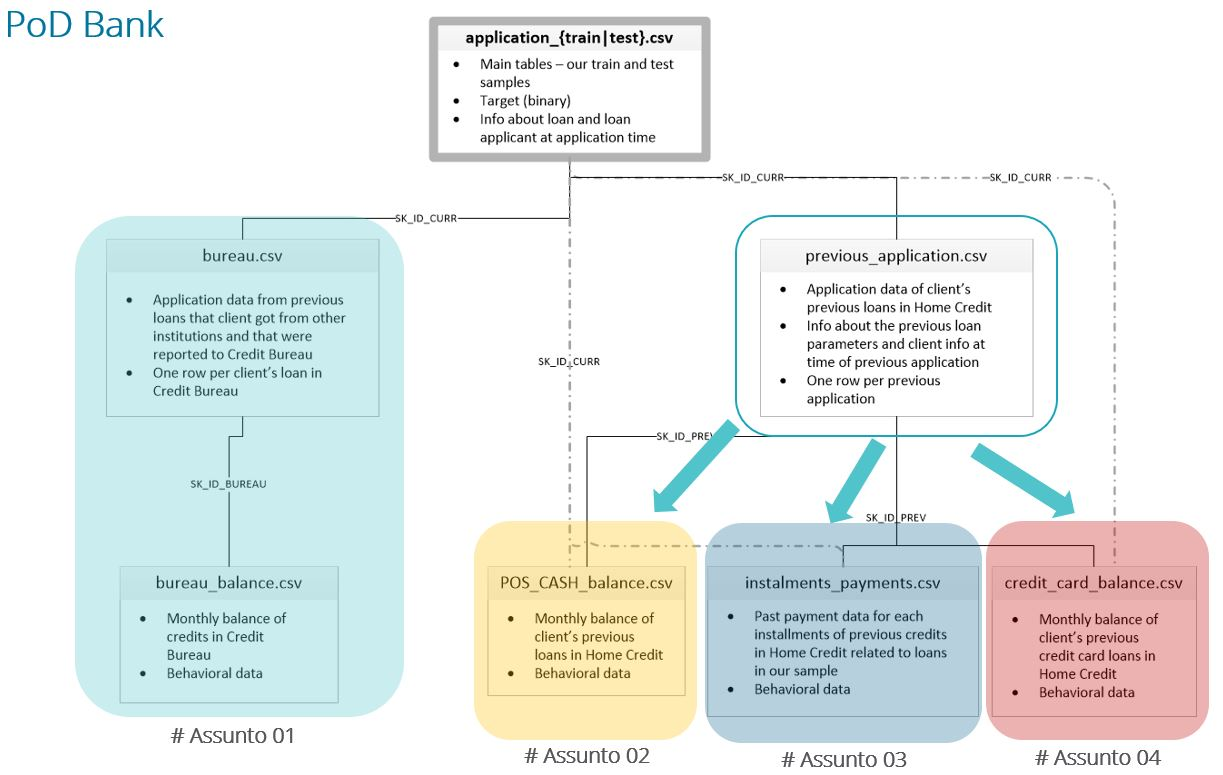

<br>
<br>
<br>
<br>

## **Dicionário de Dados**


Entender os metadados de um conjunto de dados é fundamental para projetos de modelagem de dados por várias razões. Os metadados fornecem informações essenciais sobre a estrutura, conteúdo e qualidade dos dados, o que ajuda os profissionais a compreenderem melhor o contexto em que estão trabalhando. Isso permite uma análise mais precisa e uma interpretação correta dos resultados.

In [ ]:
# Gravando diretório em uma variável.
dir = '/content/drive/MyDrive/Projetos_Big_Data_Analytics/Ciencia_de_Dados/Etapa_Modelagem_Credito/pod-academy-analise-de-credito-para-fintech'

# Carregando o arquivo com o dicionário dos dados.
df_dicionario = pd.read_csv(dir + '/database/HomeCredit_columns_description.csv', sep=',', encoding='latin-1', index_col=0)

# Exibindo as 20 primeiras linhas sem trucar dado.
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

df_dicionario.head(20)

,Table,Row,Description,Special
1,application_{train|test}.csv,SK_ID_CURR,ID of loan in our sample,NaN
2,application_{train|test}.csv,TARGET,"Target variable (1 - client with payment difficulties: he/she had late payment more than X days on at least one of the first Y installments of the loan in our sample, 0 - all other cases)",NaN
5,application_{train|test}.csv,NAME_CONTRACT_TYPE,Identification if loan is cash or revolving,NaN
6,application_{train|test}.csv,CODE_GENDER,Gender of the client,NaN
7,application_{train|test}.csv,FLAG_OWN_CAR,Flag if the client owns a car,NaN
8,application_{train|test}.csv,FLAG_OWN_REALTY,Flag if client owns a house or flat,NaN
9,application_{train|test}.csv,CNT_CHILDREN,Number of children the client has,NaN
10,application_{train|test}.csv,AMT_INCOME_TOTAL,Income of the client,NaN
11,application_{train|test}.csv,AMT_CREDIT,Credit amount of the loan,NaN
12,application_{train|test}.csv,AMT_ANNUITY,Loan annuity,NaN


In [ ]:
df_dicionario.shape

(219, 4)

<br>
<br>
<br>
<br>

## **Visualização dos Datasets**

Vamos ler todos os Datasets e entender um pouco mais sobre eles, checar a quantidade de linhas e colunas, visualizar as variáveis e fazer um link com a descrição apresentada no dicionário dos dados.

In [ ]:
# Definindo diretório do nosso database.
dir_path = '/content/drive/MyDrive/Projetos_Big_Data_Analytics/Ciencia_de_Dados/Etapa_Modelagem_Credito/pod-academy-analise-de-credito-para-fintech/database/'

<br>

### **Dataset: application_train**

In [ ]:
# Chamando a função para leitura e informações do nosso dataset.
file_name = 'application_train.csv'

info_dataset(dir_path, file_name, num_linhas=10)


Nome do DataFrame: df_application_train

Quantidade de linhas: 215257
Quantidade de colunas: 172





,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,var_38,var_39,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49,var_50
0,247330,0,Cash loans,F,N,N,0,157500.000,706410.000,67072.500,679500.000,Unaccompanied,Commercial associate,Higher education,Married,House / apartment,0.033,-14653,-2062,-8599.000,-2087,NaN,1,1,0,1,1,0,Private service staff,2.000,1,1,WEDNESDAY,13,0,0,0,0,0,0,Services,NaN,0.632,0.220,NaN,0.105,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.109,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.105,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.070,Panel,No,1.000,0.000,1.000,0.000,-1254.000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000,0.000,0.000,0.000,0.000,1.000,0.381,0.254,0.206,0.808,0.918,0.488,0.956,0.089,0.519,0.668,0.333,0.874,0.294,0.759,0.973,0.813,0.399,0.060,0.432,0.712,0.456,0.533,0.616,0.005,0.465,0.146,0.027,0.562,0.381,0.635,0.322,0.678,0.518,0.284,0.896,0.261,0.031,0.052,0.969,0.984,0.825,0.334,0.293,0.565,0.115,0.656,0.416,0.093,0.723,0.797
1,425716,1,Cash loans,F,Y,Y,1,121500.000,545040.000,25407.000,450000.000,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.007,-13995,-2246,-348.000,-172,12.000,1,1,1,1,1,0,Secretaries,3.000,2,2,MONDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.593,0.696,0.633,0.668,NaN,0.986,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.682,NaN,NaN,0.681,NaN,0.986,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.710,NaN,NaN,0.674,NaN,0.986,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.694,NaN,NaN,NaN,block of flats,0.550,"Stone, brick",No,1.000,0.000,1.000,0.000,-907.000,0,1,0,0,0,0,0,0,

<br>

### **Dataset: application_test**

In [ ]:
# Chamando a função para leitura e informações do nosso dataset.
file_name = 'application_test.csv'

info_dataset(dir_path, file_name, num_linhas=10)


Nome do DataFrame: df_application_test

Quantidade de linhas: 92254
Quantidade de colunas: 171





,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,var_38,var_39,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49,var_50
0,384575,Cash loans,M,Y,N,2,207000.000,465457.500,52641.000,418500.000,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.010,-13297,-762,-637.000,-4307,19.000,1,1,0,1,0,0,Sales staff,4.000,2,2,THURSDAY,11,0,0,0,0,1,1,Business Entity Type 3,0.676,0.605,0.001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,0.000,0.000,0.000,-2.000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000,0.000,0.000,1.000,0.000,1.000,0.499,0.626,0.266,0.025,0.098,0.570,0.688,0.499,0.161,0.908,0.414,0.434,0.063,0.056,0.054,0.170,0.793,0.755,0.094,0.166,0.186,0.423,0.773,0.950,0.775,0.322,0.060,0.378,0.515,0.644,0.524,0.947,0.680,0.264,0.589,0.326,0.893,0.609,0.701,0.692,0.634,0.664,0.088,0.350,0.248,0.700,0.709,0.625,0.847,0.446
1,214010,Cash loans,F,Y,Y,0,247500.000,1281712.500,48946.500,1179000.000,Unaccompanied,Commercial associate,Higher education,Single / not married,House / apartment,0.007,-14778,-1141,-1610.000,-4546,11.000,1,1,0,1,0,1,Managers,1.000,3,3,THURSDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.431,0.425,0.712,0.075,0.057,0.997,0.959,0.133,0.080,0.052,0.417,0.292,0.073,0.060,0.084,0.006,0.112,0.076,0.057,0.994,0.922,0.052,0.081,0.035,0.333,0.042,0.044,0.065,0.086,0.000,0.000,0.076,0.057,0.997,0.960,0.134,0.080,0.052,0.417,0.292,0.075,0.061,0.086,0.006,0.114,reg oper accou

<br>

### **Dataset: previous_application**

In [ ]:
# Chamando a função para leitura e informações do nosso dataset.
file_name = 'previous_application.csv'

info_dataset(dir_path, file_name, num_linhas=10)


Nome do DataFrame: df_previous_application

Quantidade de linhas: 1670214
Quantidade de colunas: 37





,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.000,17145.000,0.000,17145.000,SATURDAY,15,Y,1,0.000,0.183,0.867,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.000,middle,POS mobile with interest,365243.000,-42.000,300.000,-42.000,-37.000,0.000
1,2802425,108129,Cash loans,25188.615,607500.000,679671.000,NaN,607500.000,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.000,low_action,Cash X-Sell: low,365243.000,-134.000,916.000,365243.000,365243.000,1.000
2,2523466,122040,Cash loans,15060.735,112500.000,136444.500,NaN,112500.000,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.000,high,Cash X-Sell: high,365243.000,-271.000,59.000,365243.000,365243.000,1.000
3,2819243,176158,Cash loans,47041.335,450000.000,470790.000,NaN,450000.000,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.000,middle,Cash X-Sell: middle,365243.000,-482.000,-152.000,-182.000,-177.000,1.000
4,1784265,202054,Cash loans,31924.395,337500.000,404055.000,NaN,337500.000,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.000,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN
5,1383531,199383,Cash loans,23703.930,315000.000,340573.500,NaN,315000.000,SATURDAY,8,Y,1,NaN,NaN,NaN,Everyday expenses,Approved,-684,Cash through the bank,XAP,Family,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,18.000,low_normal,Cash X-Sell: low,365243.000,-654.000,-144.000,-144.000,-137.000,1.000
6,2315218,175704,Cash loans,NaN,0.000,0.000,NaN,NaN,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Canceled,-14,XNA,XAP,NaN,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN
7,1656711,296299,Cash loans,NaN,0.000,0.000,NaN,NaN,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Canceled,-21,XNA,XAP,NaN,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN
8,2367563,342292,Cash loans,NaN,0.000,0.000,NaN,NaN,MONDAY,15,Y,1,NaN,NaN,NaN,XNA,Canceled,-386,XNA,XAP,NaN,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN
9,2579447,334349,Cash loans,NaN,0.000,0.000,NaN,NaN,SATURDAY,15,Y,1,NaN,NaN,NaN,XNA,Canceled,-57,XNA,XAP,NaN,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN


<br>

### **Dataset: POS_CASH_balance**

In [ ]:
# Chamando a função para leitura e informações do nosso dataset.
file_name = 'POS_CASH_balance.csv'

info_dataset(dir_path, file_name, num_linhas=10)


Nome do DataFrame: df_POS_CASH_balance

Quantidade de linhas: 10001358
Quantidade de colunas: 8





,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,1803195,182943,-31,48.000,45.000,Active,0,0
1,1715348,367990,-33,36.000,35.000,Active,0,0
2,1784872,397406,-32,12.000,9.000,Active,0,0
3,1903291,269225,-35,48.000,42.000,Active,0,0
4,2341044,334279,-35,36.000,35.000,Active,0,0
5,2207092,342166,-32,12.000,12.000,Active,0,0
6,1110516,204376,-38,48.000,43.000,Active,0,0
7,1387235,153211,-35,36.000,36.000,Active,0,0
8,1220500,112740,-31,12.000,12.000,Active,0,0
9,2371489,274851,-32,24.000,16.000,Active,0,0


<br>

### **Dataset: installments_payments**

In [ ]:
# Chamando a função para leitura e informações do nosso dataset.
file_name = 'installments_payments.csv'

info_dataset(dir_path, file_name, num_linhas=10)


Nome do DataFrame: df_installments_payments

Quantidade de linhas: 13605401
Quantidade de colunas: 8





,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,1054186,161674,1.000,6,-1180.000,-1187.000,6948.360,6948.360
1,1330831,151639,0.000,34,-2156.000,-2156.000,1716.525,1716.525
2,2085231,193053,2.000,1,-63.000,-63.000,25425.000,25425.000
3,2452527,199697,1.000,3,-2418.000,-2426.000,24350.130,24350.130
4,2714724,167756,1.000,2,-1383.000,-1366.000,2165.040,2160.585
5,1137312,164489,1.000,12,-1384.000,-1417.000,5970.375,5970.375
6,2234264,184693,4.000,11,-349.000,-352.000,29432.295,29432.295
7,1818599,111420,2.000,4,-968.000,-994.000,17862.165,17862.165
8,2723183,112102,0.000,14,-197.000,-197.000,70.740,70.740
9,1413990,109741,1.000,4,-570.000,-609.000,14308.470,14308.470


<br>

### **Dataset: credit_card_balance**

In [ ]:
# Chamando a função para leitura e informações do nosso dataset.
file_name = 'credit_card_balance.csv'

info_dataset(dir_path, file_name, num_linhas=10)


Nome do DataFrame: df_credit_card_balance

Quantidade de linhas: 3840312
Quantidade de colunas: 23





,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,AMT_PAYMENT_CURRENT,AMT_PAYMENT_TOTAL_CURRENT,AMT_RECEIVABLE_PRINCIPAL,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,2562384,378907,-6,56.970,135000,0.000,877.500,0.000,877.500,1700.325,1800.000,1800.000,0.000,0.000,0.000,0.000,1,0.000,1.000,35.000,Active,0,0
1,2582071,363914,-1,63975.555,45000,2250.000,2250.000,0.000,0.000,2250.000,2250.000,2250.000,60175.080,64875.555,64875.555,1.000,1,0.000,0.000,69.000,Active,0,0
2,1740877,371185,-7,31815.225,450000,0.000,0.000,0.000,0.000,2250.000,2250.000,2250.000,26926.425,31460.085,31460.085,0.000,0,0.000,0.000,30.000,Active,0,0
3,1389973,337855,-4,236572.110,225000,2250.000,2250.000,0.000,0.000,11795.760,11925.000,11925.000,224949.285,233048.970,233048.970,1.000,1,0.000,0.000,10.000,Active,0,0
4,1891521,126868,-1,453919.455,450000,0.000,11547.000,0.000,11547.000,22924.890,27000.000,27000.000,443044.395,453919.455,453919.455,0.000,1,0.000,1.000,101.000,Active,0,0
5,2646502,380010,-7,82903.815,270000,0.000,0.000,0.000,0.000,4449.105,3825.000,3825.000,80519.040,82773.315,82773.315,0.000,0,0.000,0.000,2.000,Active,7,0
6,1079071,171320,-6,353451.645,585000,67500.000,67500.000,0.000,0.000,14684.175,15750.000,15750.000,345433.860,351881.145,351881.145,1.000,1,0.000,0.000,6.000,Active,0,0
7,2095912,118650,-7,47962.125,45000,45000.000,45000.000,0.000,0.000,0.000,264.690,0.000,44735.310,47962.125,47962.125,1.000,1,0.000,0.000,51.000,Active,0,0
8,2181852,367360,-4,291543.075,292500,90000.000,289339.425,0.000,199339.425,130.500,4093.515,4093.515,285376.410,286831.575,286831.575,3.000,8,0.000,5.000,3.000,Active,0,0
9,1235299,203885,-5,201261.195,225000,76500.000,111026.700,0.000,34526.700,6338.340,45000.000,45000.000,192793.275,197224.695,197224.695,3.000,9,0.000,6.000,38.000,Active,0,0


<br>

### **Dataset: bureau**

In [ ]:
# Chamando a função para leitura e informações do nosso dataset.
file_name = 'bureau.csv'

info_dataset(dir_path, file_name, num_linhas=10)


Nome do DataFrame: df_bureau

Quantidade de linhas: 1716428
Quantidade de colunas: 17





,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.000,-153.000,NaN,0,91323.000,0.000,NaN,0.000,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.000,NaN,NaN,0,225000.000,171342.000,NaN,0.000,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.000,NaN,NaN,0,464323.500,NaN,NaN,0.000,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.000,NaN,NaN,0.000,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.000,NaN,77674.500,0,2700000.000,NaN,NaN,0.000,Consumer credit,-21,NaN
5,215354,5714467,Active,currency 1,-273,0,27460.000,NaN,0.000,0,180000.000,71017.380,108982.620,0.000,Credit card,-31,NaN
6,215354,5714468,Active,currency 1,-43,0,79.000,NaN,0.000,0,42103.800,42103.800,0.000,0.000,Consumer credit,-22,NaN
7,162297,5714469,Closed,currency 1,-1896,0,-1684.000,-1710.000,14985.000,0,76878.450,0.000,0.000,0.000,Consumer credit,-1710,NaN
8,162297,5714470,Closed,currency 1,-1146,0,-811.000,-840.000,0.000,0,103007.700,0.000,0.000,0.000,Consumer credit,-840,NaN
9,162297,5714471,Active,currency 1,-1146,0,-484.000,NaN,0.000,0,4500.000,0.000,0.000,0.000,Credit card,-690,NaN


<br>

### **Dataset: bureau_balance**

In [ ]:
# Chamando a função para leitura e informações do nosso dataset.
file_name = 'bureau_balance.csv'

info_dataset(dir_path, file_name, num_linhas=10)


Nome do DataFrame: df_bureau_balance

Quantidade de linhas: 27299925
Quantidade de colunas: 3





,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,5715448,0,C
1,5715448,-1,C
2,5715448,-2,C
3,5715448,-3,C
4,5715448,-4,C
5,5715448,-5,C
6,5715448,-6,C
7,5715448,-7,C
8,5715448,-8,C
9,5715448,-9,0


<br>
<br>
<br>
<br>

## **Análise Exploratória dos Dados**

Uma análise exploratória de dados pode fornecer insights valiosos sobre o perfil do cliente, padrões de pagamento e riscos associados à carteira de crédito, ajudando as instituições financeiras a tomar decisões mais informadas e eficazes.
<br>
<br>
Analisar o cenário atual da carteira também é essencial para contextualizar os resultados do modelo de previsão de inadimplência e garantir que ele seja eficaz e relevante para as condições atuais do mercado e do cliente.
<br>
<br>
Vamos fazer essa análise baseada em nossa tabela de **application_train** que é  a nossa carteira atual de clientes.

<br>

### **Estudo do público**

In [ ]:
# Seta o formato dos resultados numéricos.
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Descreve as principais métricas do conjunto de dados.
df_application_train.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,var_38,var_39,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49,var_50
count,215257.000,215257.000,215257.000,215257.000,215257.000,215249.000,215058.000,215257.000,215257.000,215257.000,215257.000,215257.000,73421.000,215257.000,215257.000,215257.000,215257.000,215257.000,215257.000,215256.000,215257.000,215257.000,215257.000,215257.000,215257.000,215257.000,215257.000,215257.000,215257.000,94008.000,214784.000,172420.000,105957.000,89273.000,110268.000,72118.000,64880.000,100536.000,106839.000,108075.000,69261.000,87450.000,68178.000,107173.000,65850.000,96369.000,105957.000,89273.000,110268.000,72118.000,64880.000,100536.000,106839.000,108075.000,69261.000,87450.000,68178.000,107173.000,65850.000,96369.000,105957.000,89273.000,110268.000,72118.000,64880.000,100536.000,106839.000,108075.000,69261.000,87450.000,68178.000,107173.000,65850.000,96369.000,111352.000,214553.000,214553.000,214553.000,214553.000,215256.000,215257.000,215257.000,215257.000,215257.000,215257.000,215257.000,215257.000,215257.000,215257.000,215257.000,215257.000,215257.000,215257.000,215257.000,215257.000,215257.000,215257.000,215257.000,215257.000,215257.000,186107.000,186107.000,186107.000,186107.000,186107.000,186107.000,215257.000,215257.000,215257.000,215257.000,215257.000,215257.000,215257.000,215257.000,215257.000,215257.000,215257.000,215257.000,215257.000,215257.000,215257.000,215257.000,215257.000,215257.000,215257.000,215257.000,215257.000,215257.000,215257.000,215257.000,215257.000,215257.000,215257.000,215257.000,215257.000,215257.000,215257.000,215257.000,215257.000,215257.000,215257.000,215257.000,215257.000,215257.000,215257.000,215257.000,215257.000,215257.000,215257.000,215257.000,215257.000,215257.000,215257.000,215257.000,215257.000,215257.000
mean,278236.387,0.081,0.417,168556.848,599495

A partir da descrição dos dados já podemos ter informações e insights importantes como, por exemplo:
  - **Renda Média:** $ 168.557

  - **Média do Valor de Empréstimo:** $ 599.496

  - **Média de Idade:** 44 anos

  - **Média de Membros na Família:** 2 pessoas

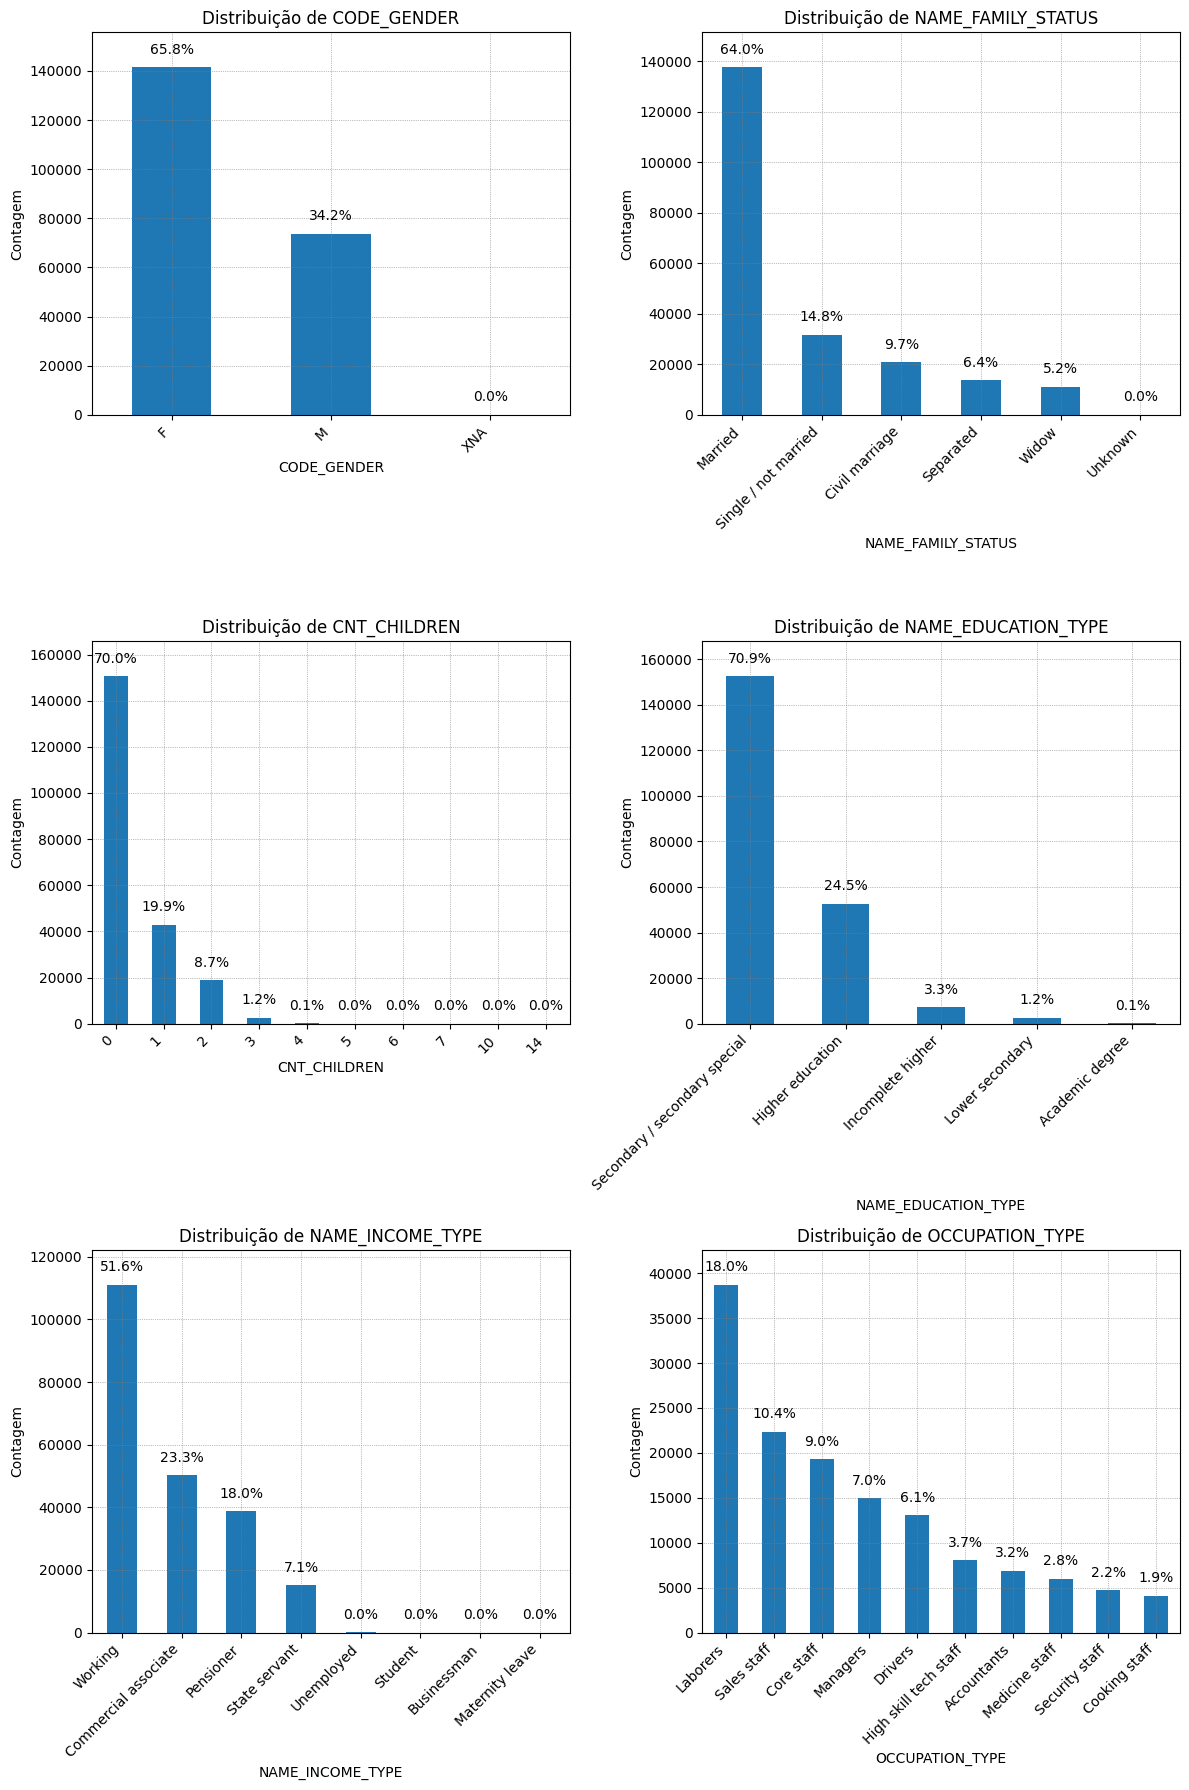

In [ ]:
# Criando uma lista com as variáveis categoricas que queremos plotar.
vars = ['CODE_GENDER', 'NAME_FAMILY_STATUS', 'CNT_CHILDREN', 'NAME_EDUCATION_TYPE', 'NAME_INCOME_TYPE', 'OCCUPATION_TYPE']

# Chamando a função para a criação dos gráficos de colunas.
plot_columns(df_application_train, vars)

A partir da plotagem dos gráficos de colunas podemos obter mais algumas informações sobre o perfil dos nossos clientes como, por exemplo:
  - **Gênero:** Podemos verificar que mais de 65% dos clientes são do gênero feminino, quase o dobro de clientes.

  - **Estado Civil:** 64% dos clientes são casados.

  - **Filhos:** A grande maioria dos clientes não possuem filhos.

  - **Escolaridade:** O Ensino Médio é o nível escolar mais comum entre os clientes, com quase 71%, bem acima dos demais níveis.

  - **Profissão:** Mais da metade dos clientes trabalham e a profissão mais comum entre eles é a de operário.

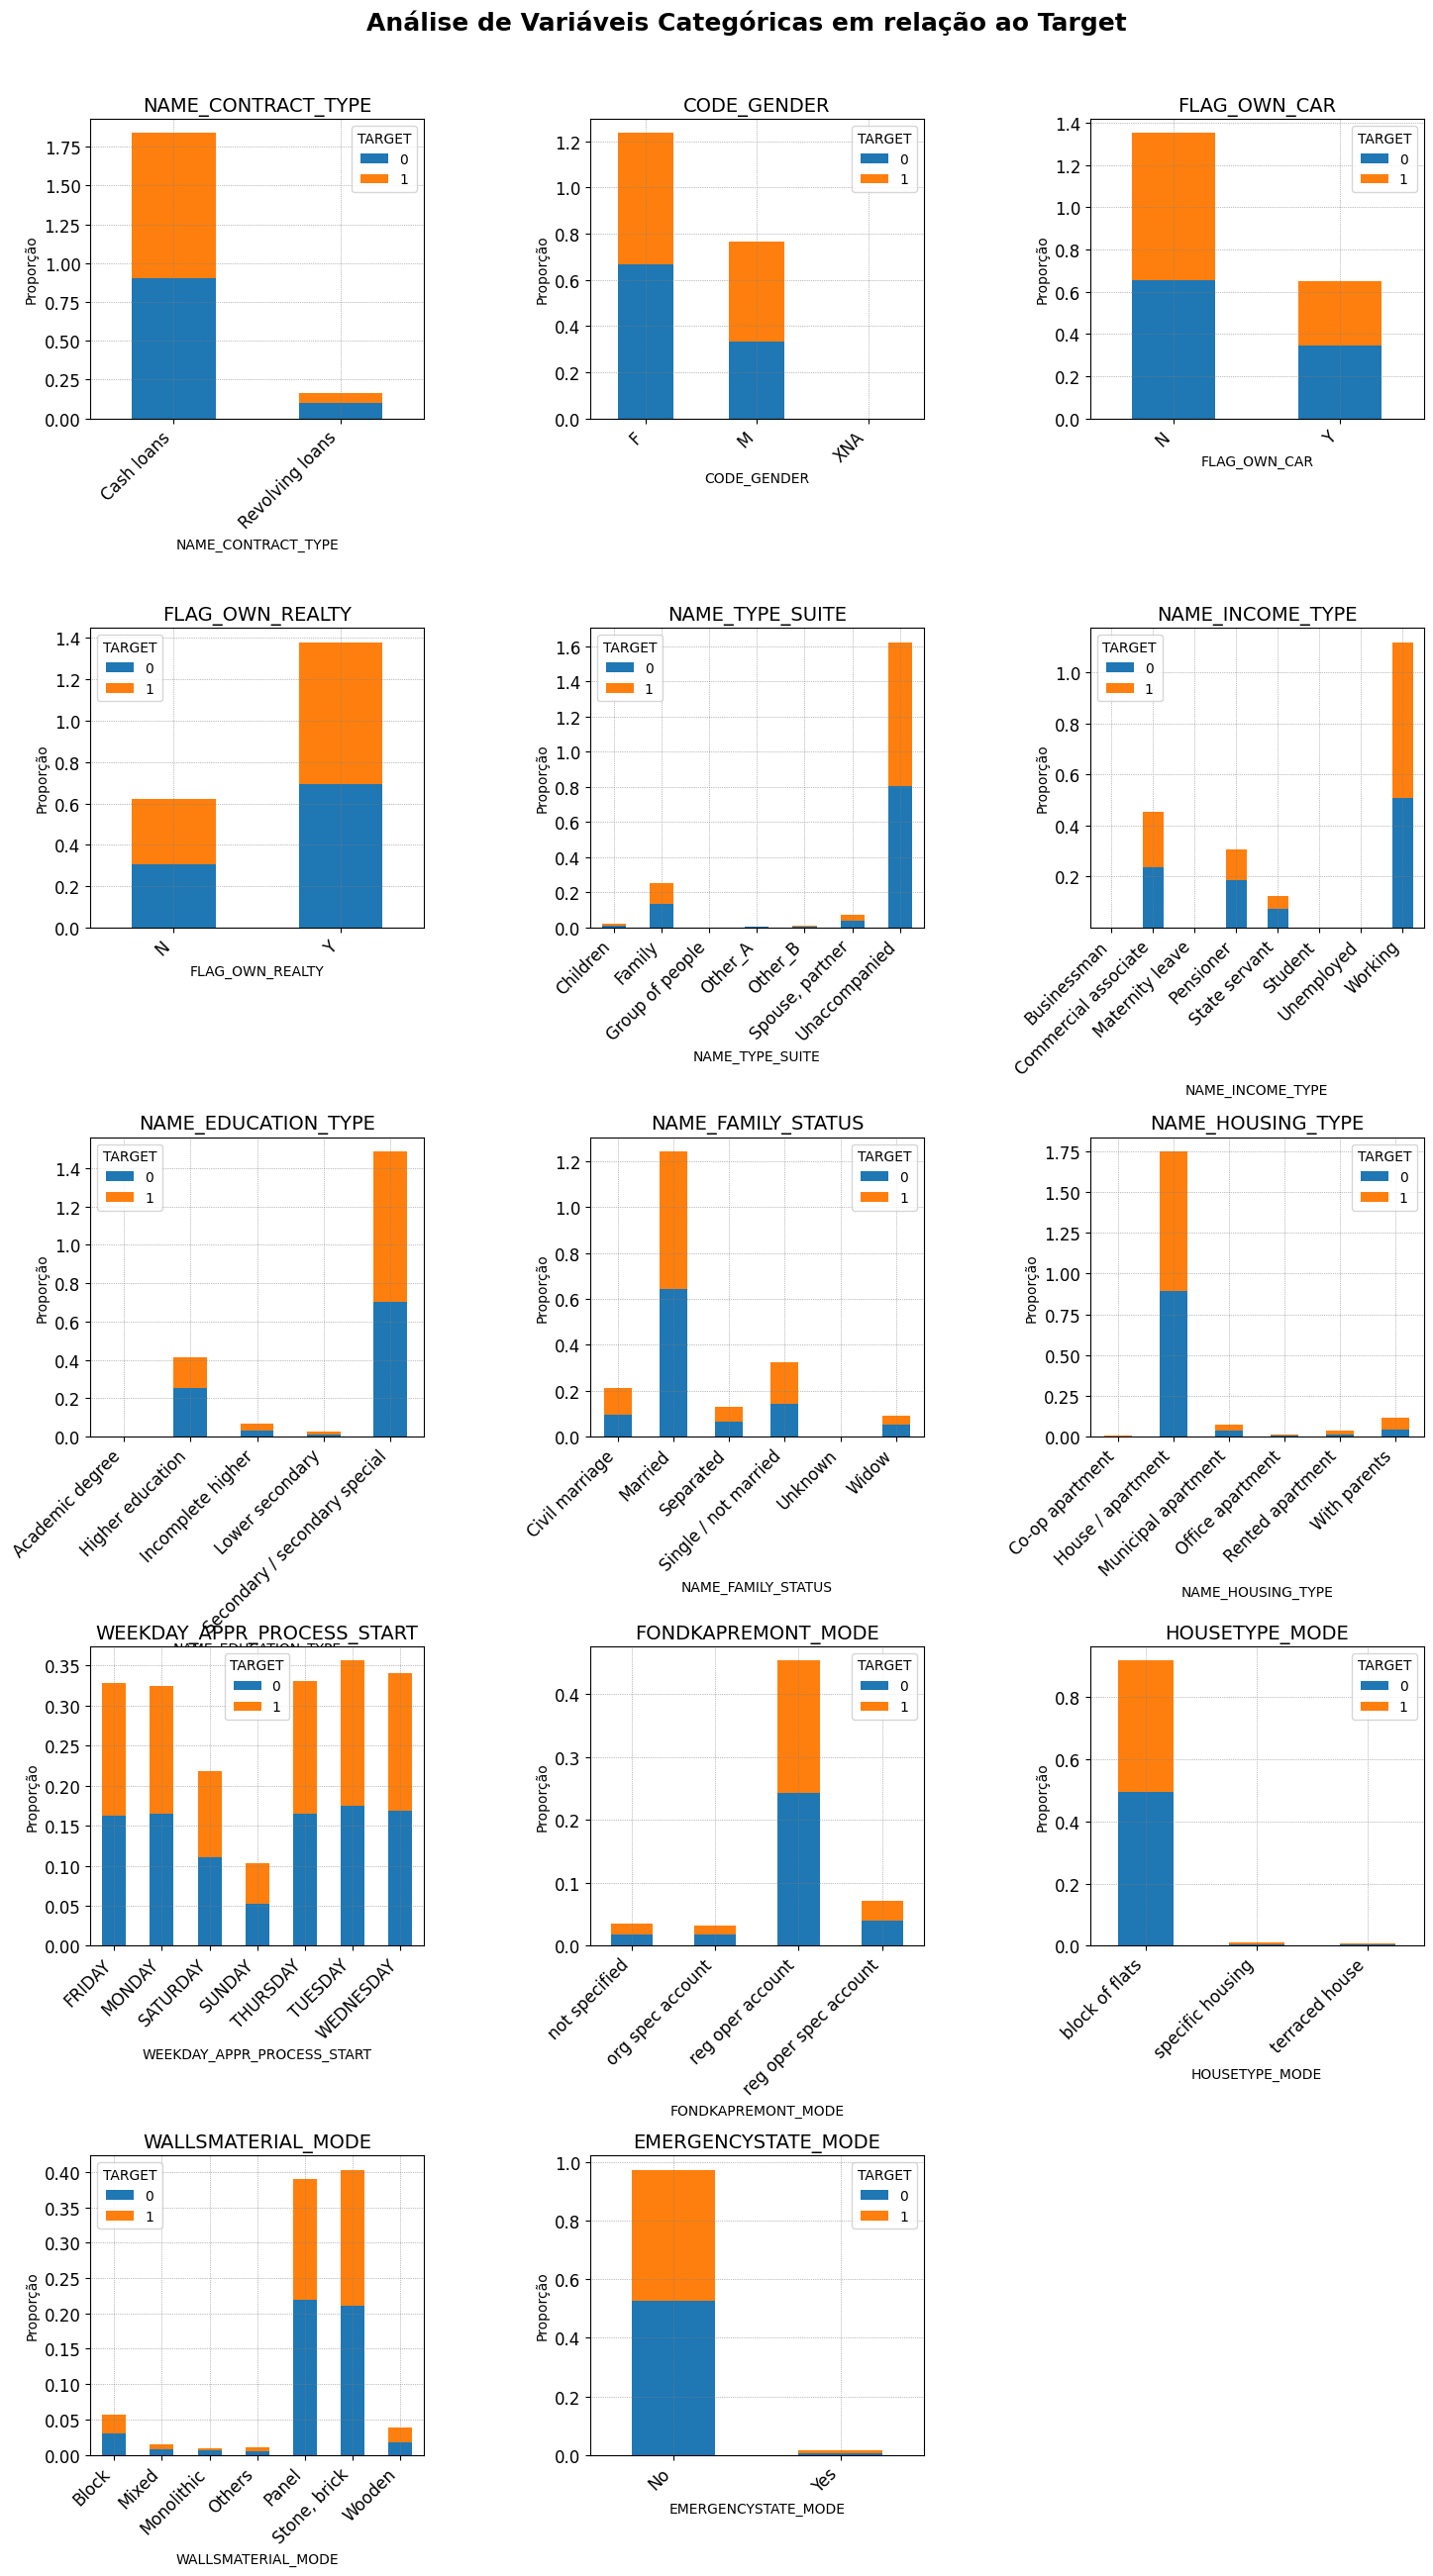

In [ ]:
# Plotando gráficos de colunas empilhadas com a relação entre as variáveis categóricas e o target.
plot_cat_vs_target_cutoff(df_application_train, 'TARGET', cutoff=8)     # limitando para as variáveis com até 8 de cardinalidade.

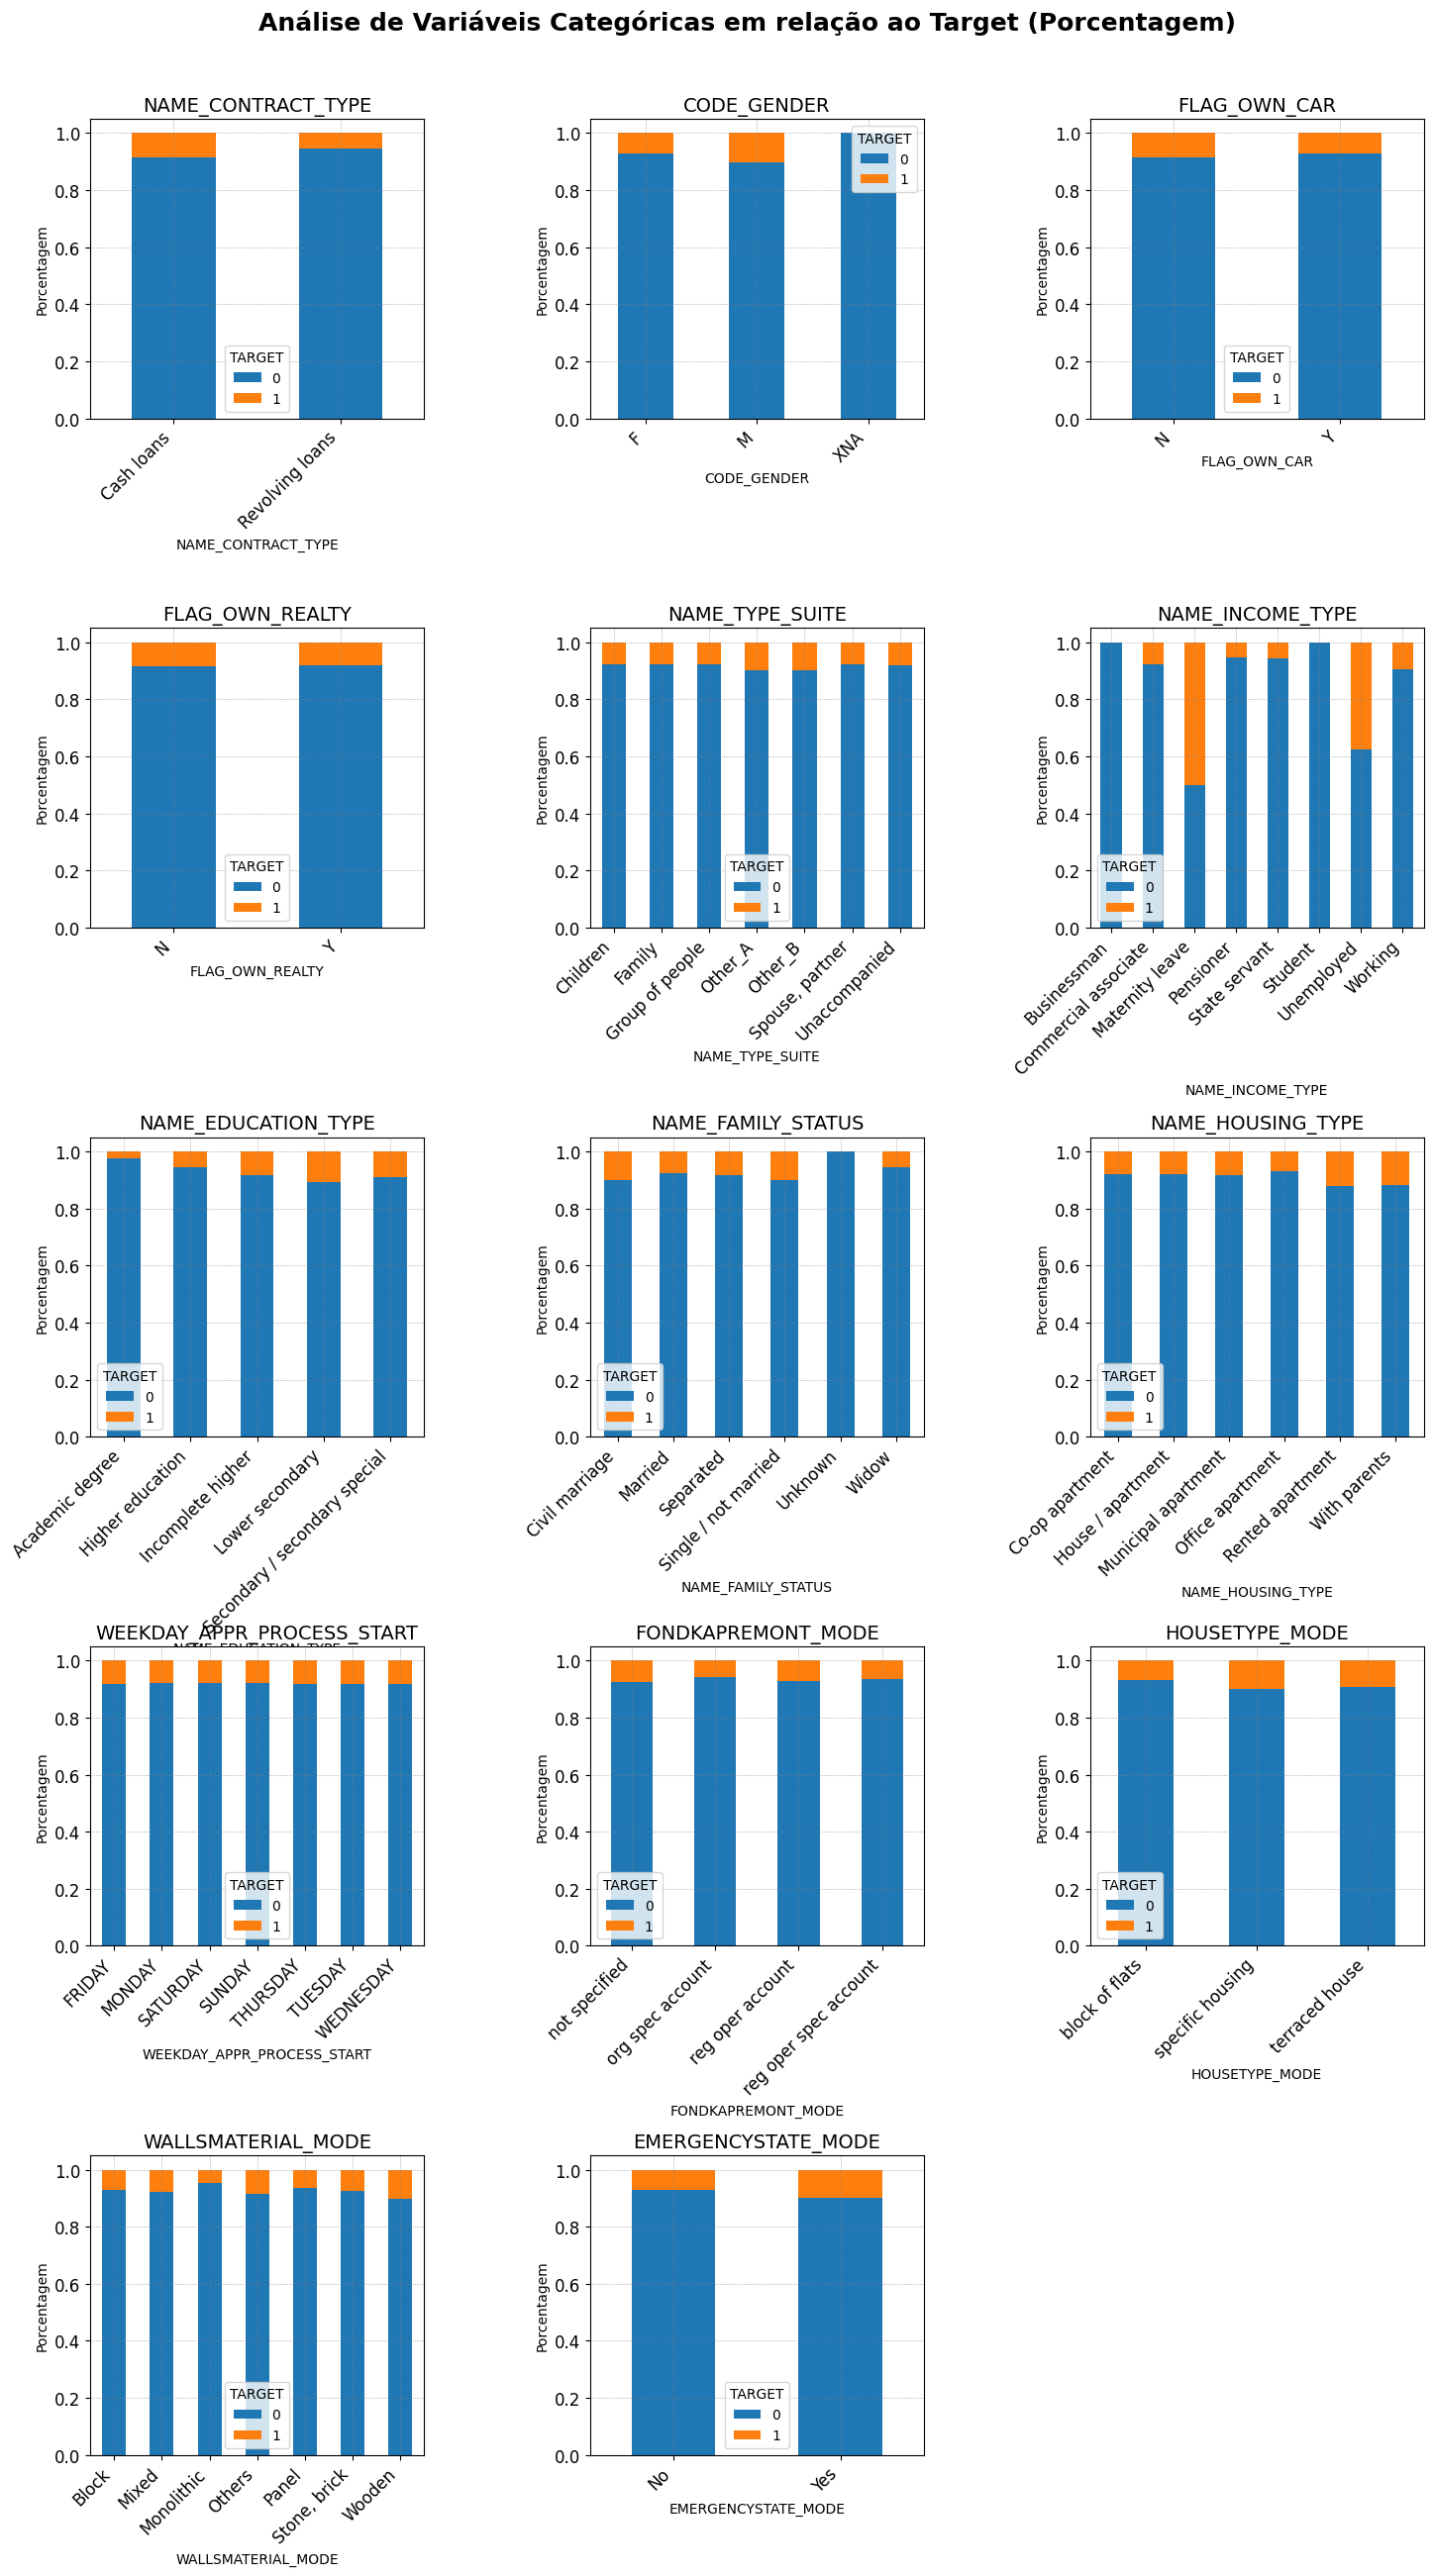

In [ ]:
# Plotando gráficos de colunas empilhadas 100% com a relação entre as variáveis categóricas e o target.
plot_cat_vs_target_percentage(df_application_train, 'TARGET', cutoff=8)     # limitando para as variáveis com até 8 de cardinalidade.

Podemos notar, que de modo geral, não há nenhuma categoria que esteja muito relacionada com o target, a distribuição é bem próxima. Na variável **`NAME_INCOME_TYPE`** até existem categorias com predominância de inadimplentes ou adimplentes, mas essas categorias não são representativas, pois possuem menos de 1% de registros, então não teriam um bom poder preditivo para o modelo.


<br>

### **Cenário atual da carteira**

In [ ]:
# Verificando e printando a quantidade de clientes da carteira e de tipo de empréstimo.
vol_publico = df_application_train.shape[0]
vol_cash = df_application_train[df_application_train['NAME_CONTRACT_TYPE'] == 'Cash loans'].shape[0]
vol_revolving = df_application_train[df_application_train['NAME_CONTRACT_TYPE'] == 'Revolving loans'].shape[0]

print(Fore.BLUE + '=' * 60)
print('')
print(f'{Fore.BLUE}{Style.BRIGHT}Quantidade de empréstimos:{Style.RESET_ALL}', vol_publico)
print('')
print(f'{Fore.BLUE}{Style.BRIGHT}Quantidade de Cash loans:{Style.RESET_ALL}', vol_cash)
print('')
print(f'{Fore.BLUE}{Style.BRIGHT}Quantidade de Revolving loans:{Style.RESET_ALL}', vol_revolving)
print('')
print(Fore.BLUE + '=' * 60 + Style.RESET_ALL)


Quantidade de empréstimos: 215257

Quantidade de Cash loans: 194663

Quantidade de Revolving loans: 20594



In [ ]:
# Verificando e printando valor médio dos empréstimos.
val_med_emp = round(df_application_train['AMT_CREDIT'].mean())
val_med_cash = round(df_application_train[df_application_train['NAME_CONTRACT_TYPE'] == 'Cash loans']['AMT_CREDIT'].mean())
val_med_revolving = round(df_application_train[df_application_train['NAME_CONTRACT_TYPE'] == 'Revolving loans']['AMT_CREDIT'].mean())

print(Fore.BLUE + '=' * 60)
print('')
print(f'{Fore.BLUE}{Style.BRIGHT}Valor médio dos empréstimos:{Style.RESET_ALL}', val_med_emp)
print('')
print(f'{Fore.BLUE}{Style.BRIGHT}Valor médio por Cash loans:{Style.RESET_ALL}', val_med_cash)
print('')
print(f'{Fore.BLUE}{Style.BRIGHT}Valor médio por Revolving loans:{Style.RESET_ALL}', val_med_revolving)
print('')
print(Fore.BLUE + '=' * 60 + Style.RESET_ALL)


Valor médio dos empréstimos: 599496

Valor médio por Cash loans: 628525

Valor médio por Revolving loans: 325106



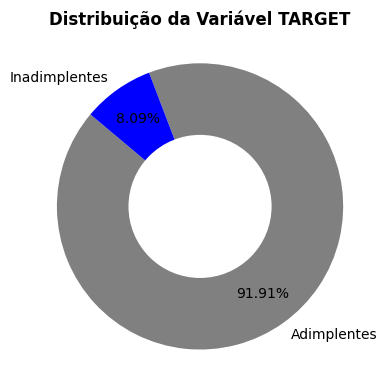

In [ ]:
# Conta as ocorrências de cada categoria na variável 'TARGET'.
target_counts = df_application_train['TARGET'].value_counts()

# Preparando os dados para o gráfico de rosca.
labels_01 = ['Adimplentes' if idx == 0 else 'Inadimplentes' for idx in target_counts.index]
sizes_01 = target_counts.values
colors_01 = ['gray', 'blue']

# Plotando o gráfico de rosca.
fig, ax = plt.subplots(figsize=(4, 4))
ax.pie(sizes_01, labels=labels_01, colors=colors_01, autopct='%1.2f%%', startangle=140, pctdistance=0.75)
ax.set_title('Distribuição da Variável TARGET', fontsize=12, fontweight='bold')
centre_circle = plt.Circle((0,0),0.50,fc='white')
fig.gca().add_artist(centre_circle)
ax.axis('equal')

plt.tight_layout()
plt.show()

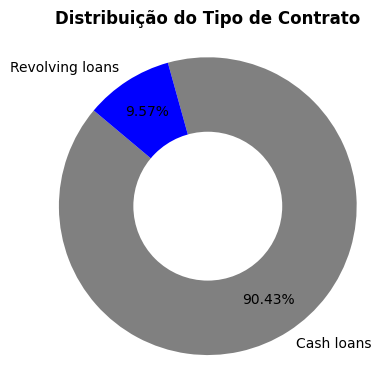

In [ ]:
# Conta as ocorrências de cada categoria na variável 'NAME_CONTRACT_TYPE'.
contract_type_counts = df_application_train['NAME_CONTRACT_TYPE'].value_counts()

# Preparando os dados para o gráfico de rosca.
labels_02 = contract_type_counts.index
sizes_02 = contract_type_counts.values
colors_02 = ['gray', 'blue']

# Plotando o gráfico de rosca.
fig, ax = plt.subplots(figsize=(4, 4))
ax.pie(sizes_02, labels=labels_02, colors=colors_02, autopct='%1.2f%%', startangle=140, pctdistance=0.75)
ax.set_title('Distribuição do Tipo de Contrato', fontsize=12, fontweight='bold')
centre_circle = plt.Circle((0,0),0.50,fc='white')
fig.gca().add_artist(centre_circle)
ax.axis('equal')

plt.tight_layout()
plt.show()

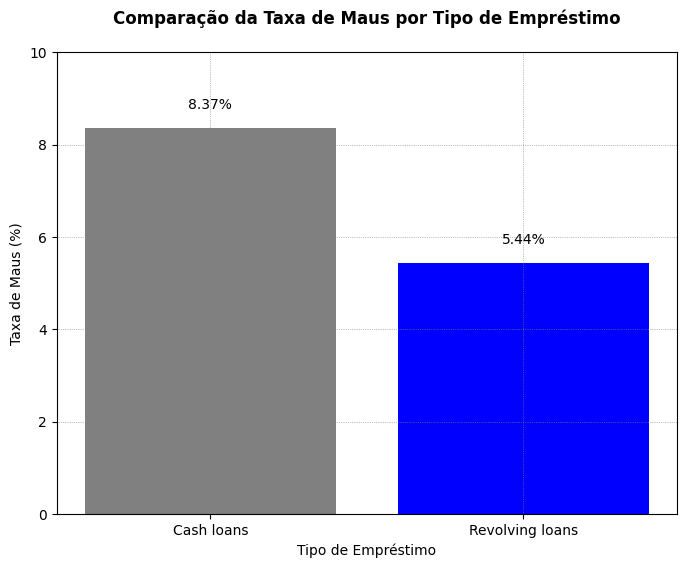

In [ ]:
# Filtrar o DataFrame para as duas categorias de contrato
cash_loans_df = df_application_train[df_application_train['NAME_CONTRACT_TYPE'] == 'Cash loans']
revolving_loans_df = df_application_train[df_application_train['NAME_CONTRACT_TYPE'] == 'Revolving loans']

# Calcular a taxa de maus para cada categoria
taxa_maus_cash_loans = cash_loans_df['TARGET'].mean() * 100
taxa_maus_revolving_loans = revolving_loans_df['TARGET'].mean() * 100

# Preparar os dados para o gráfico de colunas
categorias = ['Cash loans', 'Revolving loans']
taxas_maus = [taxa_maus_cash_loans, taxa_maus_revolving_loans]

# Plotar o gráfico de colunas
plt.figure(figsize=(8, 6))
bars = plt.bar(categorias, taxas_maus, color=['gray', 'blue'])

# Adicionar a porcentagem acima das colunas
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.5, f'{height:.2f}%', ha='center', va='center')

plt.xlabel('Tipo de Empréstimo')
plt.ylabel('Taxa de Maus (%)')
plt.title('Comparação da Taxa de Maus por Tipo de Empréstimo', fontsize=12, fontweight='bold', pad=20)

# Ajustar os limites do eixo y para dar espaço adicional para as porcentagens.
plt.ylim(0, 10)

# Adicionar linhas de grade.
plt.grid(color='gray', linestyle=':', linewidth=0.5, zorder=0)

plt.show()

É possível verificar que a taxa de inadimplentes é baixa, menos de 10% da carteira.

O tipo de empréstimo 'Cash loans' é o mais solicitado pelos clientes, mais de 90% da carteira é de 'Cash loans'.

Já a taxa de maus por produto não foge muito da taxa de maus da carteira como um todo, com 'Revolving loans' tendo uma taxa menor de maus que 'Cash loans'.

<br>

### **Premissas**

Em nossa base de dados não existe a informação de taxa de juros aplicada em cada empréstimo concedido, porém é um informação que será muito útil para avaliarmos o modelo em termos financeiros, sendo assim vamos simular uma taxa de juros média com os dados que possuímos.

In [ ]:
# Simulando uma taxa de juros.


<br>

### **Nota Importante**

Ao fazer a análise exploratória dos dados, podemos observar a ausência de datas no dataset principal de application, sendo assim já sabemos que não vamos conseguir trabalhar com safras neste projeto.
<br>
<br>
Vimos também que a base **application_train** já possui a variável target, sendo assim não será necessário fazer a construção do target.